In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets, model_selection
from sklearn import svm

data2 = pd.read_csv('ArASL_data.csv', sep = ',')
data2.head(5)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0  jeem     235     234     233     233     232     232     231     231   
1  jeem     220     220     220     220     220     220     220     221   
2  jeem     211     212     214     216     215     215     214     213   
3  jeem      29      29      29      28      28      28      28      28   
4  jeem     236     236     236     236     236     236     236     236   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     230  ...       160       158       156       154       153       152   
1     221  ...       126       121       116       113       110       108   
2     214  ...       187       184       179       177       178       182   
3      28  ...       163       163       179       192       198       201   
4     238  ...       158       158       158       163       167       170   

   pixel781  pixel782  pixel783  pixel784  
0       151       150       149       148  
1       105       104       102       101  
2       188       189       189       187  
3       203       163        45        20  
4       174       179       184       183  

[5 rows x 785 columns]

In [15]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [16]:
data = downsample(data2,'label')

In [17]:
ratio=0.8
k=5

In [18]:
X_train = []
Y_train = []
x_train, x_test_p, y_train, y_test_p=train_test_split(data.drop(['label'], axis=1), data[['label']], test_size=1-ratio)

x_test = x_test_p.to_numpy()
y_test = y_test_p.to_numpy().reshape(len(y_test_p))
x_train_f = x_train.to_numpy()
y_train_f = y_train.to_numpy().reshape(len(y_train))


for i in range(0,k-1):
    x_train_1, x_train_2, y_train_1, y_train_2=train_test_split(x_train, y_train, test_size=1/(k-i))
    X_train.append(x_train_2.to_numpy())
    Y_train.append(y_train_2.to_numpy().reshape(len(y_train_2)))
    x_train = x_train_1.copy()
    y_train = y_train_1.copy()
X_train.append(x_train_1.to_numpy())
Y_train.append(y_train_1.to_numpy().reshape(len(y_train_1)))
   
for i in range(len(X_train)):
    print(X_train[i].shape, Y_train[i].shape)
print(x_test.shape,y_test.shape)

(5141, 784) (5141,)
(5141, 784) (5141,)
(5140, 784) (5140,)
(5140, 784) (5140,)
(5140, 784) (5140,)
(6426, 784) (6426,)


In [19]:
def accuracy(y,y_hat):
  yb = (y == y_hat)
  return np.sum(yb)/np.size(y)

In [25]:
K_max = 5
X_print=np.linspace(1,K_max,K_max)
Y_print=[]
Acc_mean=[]
for k in range(0,K_max+1):
    Acc = []
    print(k)
    for i in range(len(X_train)):
        x_val = X_train[i]
        y_val = Y_train[i]
        list_x = np.array(X_train)
        list_y = np.array(Y_train)
        list_x = np.delete(list_x,i)
        list_y = np.delete(list_y,i)
        x_train = list_x[0]
        y_train = list_y[0]
        for j in range(1,len(list_x)):
            x_train_2 = x_train.copy()
            y_train_2 = y_train.copy()
            x_train = np.concatenate((x_train_2,list_x[j]))
            y_train = np.concatenate((y_train_2,list_y[j]))
        print(x_train.shape,y_train.shape)
        svc=svm.SVC(kernel='poly', degree=2*k)
        svc.fit(x_train, y_train)
        y_hat_scikit = svc.predict(x_val)
        Acc.append(accuracy(y_val, y_hat_scikit))
    Acc_mean.append(np.mean(Acc))
print(Acc_mean)

0


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
1


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
2


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
3


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
4


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
5


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-25-9c39d5dfd94b>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-25-9c39d5dfd94b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
[0.02964763324066765, 0.9369699910008575, 0.9643607392163556, 0.9576297817878248, 0.9305501965203821, 0.8875574783328049]


In [31]:
svc=svm.SVC(kernel='poly', degree=3)

In [32]:
svc.fit(x_train_f,y_train_f)

SVC(kernel='poly')

In [33]:
y_pred=svc.predict(x_test)


In [34]:
def accuracy(y,y_hat):
  yb = (y == y_hat)
  return np.sum(yb)/np.size(y)

In [35]:
print(accuracy(y_test, y_pred))

0.9727668845315904


In [12]:
X_print = [2,3,4,5,6,8,10]
Acc_mean2 = Acc_mean
print(Acc_mean2)

[0.9376315906987165, 0.9667342346603979, 0.9660727863358354, 0.9644387116013251, 0.960003269663202, 0.9326901229680974, 0.8907868989439441]


In [13]:
Acc_mean=[0.9376315906987165, 0.9667342346603979, 0.9660727863358354, 0.9644387116013251, 0.960003269663202, 0.9326901229680974, 0.8907868989439441]

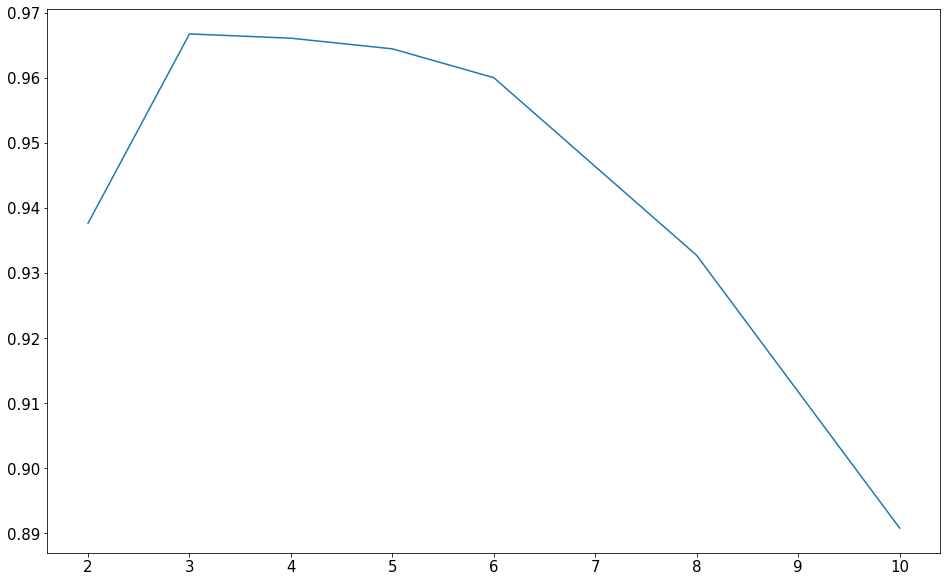

In [14]:
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 35,'xtick.labelsize' : 15,'ytick.labelsize' : 15}
plt.rcParams.update(parameters)


fig = plt.figure(1, figsize=(16, 10))
plt.plot(X_print,Acc_mean2)
plt.savefig('figure1'
       )

In [26]:
k=5
Acc = []
for i in range(len(X_train)):
    x_val = X_train[i]
    y_val = Y_train[i]
    list_x = np.array(X_train)
    list_y = np.array(Y_train)
    list_x = np.delete(list_x,i)
    list_y = np.delete(list_y,i)
    x_train = list_x[0]
    y_train = list_y[0]
    for j in range(1,len(list_x)):
        x_train_2 = x_train.copy()
        y_train_2 = y_train.copy()
        x_train = np.concatenate((x_train_2,list_x[j]))
        y_train = np.concatenate((y_train_2,list_y[j]))
    print(x_train.shape,y_train.shape)
    svc=svm.SVC(kernel='poly', degree=k)
    svc.fit(x_train, y_train)
    y_hat_scikit = svc.predict(x_val)
    Acc.append(accuracy(y_val, y_hat_scikit))
print(np.mean(Acc))

<ipython-input-26-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-26-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-26-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-26-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-26-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-26-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-26-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-26-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-26-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-26-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
0.962882215681214


In [27]:
k=3
Acc = []
for i in range(len(X_train)):
    x_val = X_train[i]
    y_val = Y_train[i]
    list_x = np.array(X_train)
    list_y = np.array(Y_train)
    list_x = np.delete(list_x,i)
    list_y = np.delete(list_y,i)
    x_train = list_x[0]
    y_train = list_y[0]
    for j in range(1,len(list_x)):
        x_train_2 = x_train.copy()
        y_train_2 = y_train.copy()
        x_train = np.concatenate((x_train_2,list_x[j]))
        y_train = np.concatenate((y_train_2,list_y[j]))
    print(x_train.shape,y_train.shape)
    svc=svm.SVC(kernel='poly', degree=k)
    svc.fit(x_train, y_train)
    y_hat_scikit = svc.predict(x_val)
    Acc.append(accuracy(y_val, y_hat_scikit))
print(np.mean(Acc))

<ipython-input-27-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-27-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-27-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-27-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-27-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-27-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-27-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-27-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-27-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-27-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
0.9644774707338654


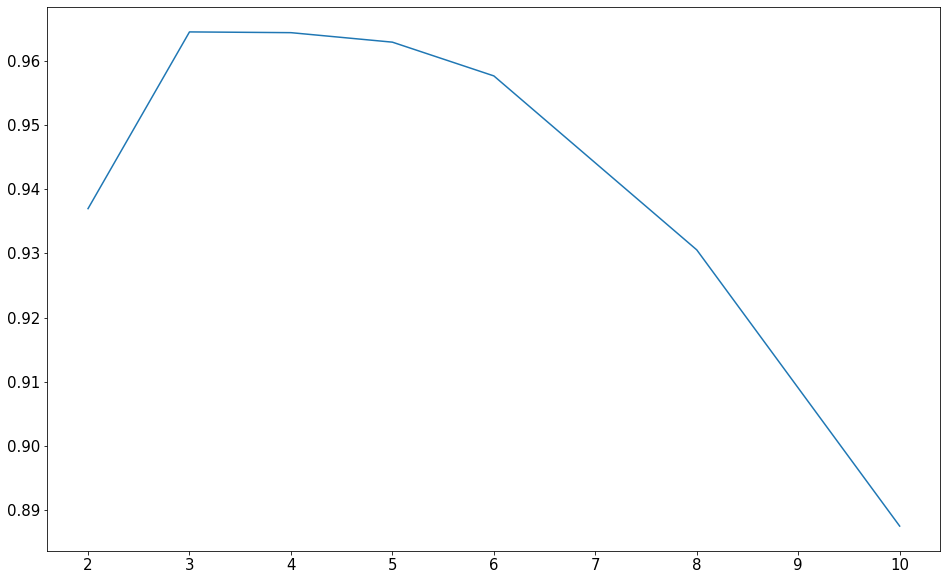

In [30]:
A = [ 0.9369699910008575, 0.9644774707338654, 0.9643607392163556, 0.962882215681214, 0.9576297817878248, 0.9305501965203821, 0.8875574783328049]
B = [2,3,4,5,6,8,10]
fig = plt.figure(1, figsize=(16, 10))
plt.plot(B,A)
plt.savefig('figure1'
       )